# Лабораторная работа №4

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Приведенная выборка из ЛР1

In [57]:
df = pd.read_csv("heart_2022_with_nans.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [58]:
df = df.dropna() 
df.drop_duplicates()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445117,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
445123,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445124,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


/var/folders/bq/c80vs6ps41g7kryqnrgx11wm0000gn/T/ipykernel_1056/2180078691.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HadHeartAttack',data=df,palette='pastel')


<Axes: xlabel='HadHeartAttack', ylabel='count'>

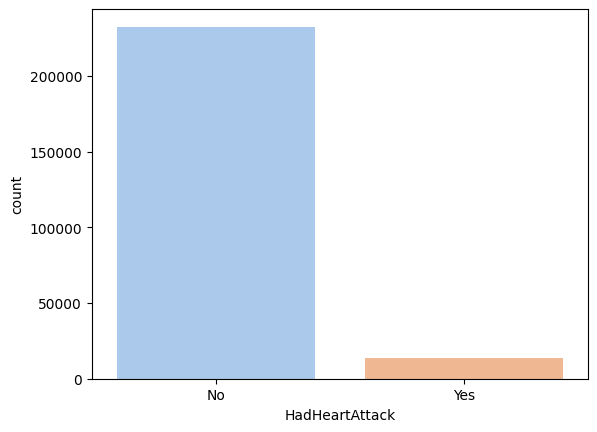

In [59]:
sns.countplot(x='HadHeartAttack',data=df,palette='pastel')

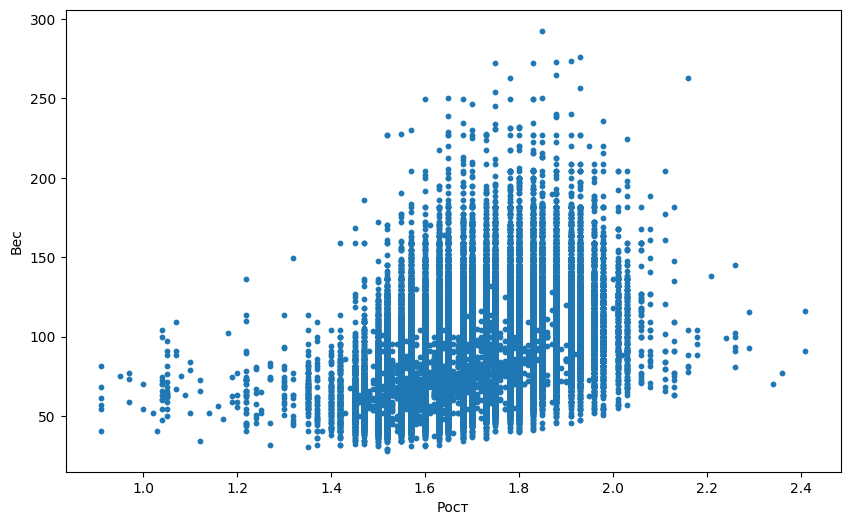

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=df['HeightInMeters'], y=df['WeightInKilograms'], s=10)
plt.xlabel("Рост")
plt.ylabel("Вес")

plt.show()

In [61]:
numeric_features=['BMI', 'PhysicalHealthDays', 'SleepHours']
categorical_features=['HadHeartAttack', 'SmokerStatus', 'AlcoholDrinkers', 'HadStroke', 'Sex', 'AgeCategory',
       'RaceEthnicityCategory', 'HadDiabetes', 'PhysicalActivities', 'GeneralHealth', 'HadAsthma', 'HadKidneyDisease', 'HadSkinCancer']

/var/folders/bq/c80vs6ps41g7kryqnrgx11wm0000gn/T/ipykernel_1056/2825207777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
/var/folders/bq/c80vs6ps41g7kryqnrgx11wm0000gn/T/ipykernel_1056/2825207777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
/var/folders/bq/c80vs6ps41g7kryqnrgx11wm0000gn/T/ipykernel_1056/2825207777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
/var/folders/bq/c80vs6ps41g7kryqnrgx11wm0000gn/T/ipykernel_1056/2825207777.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usi

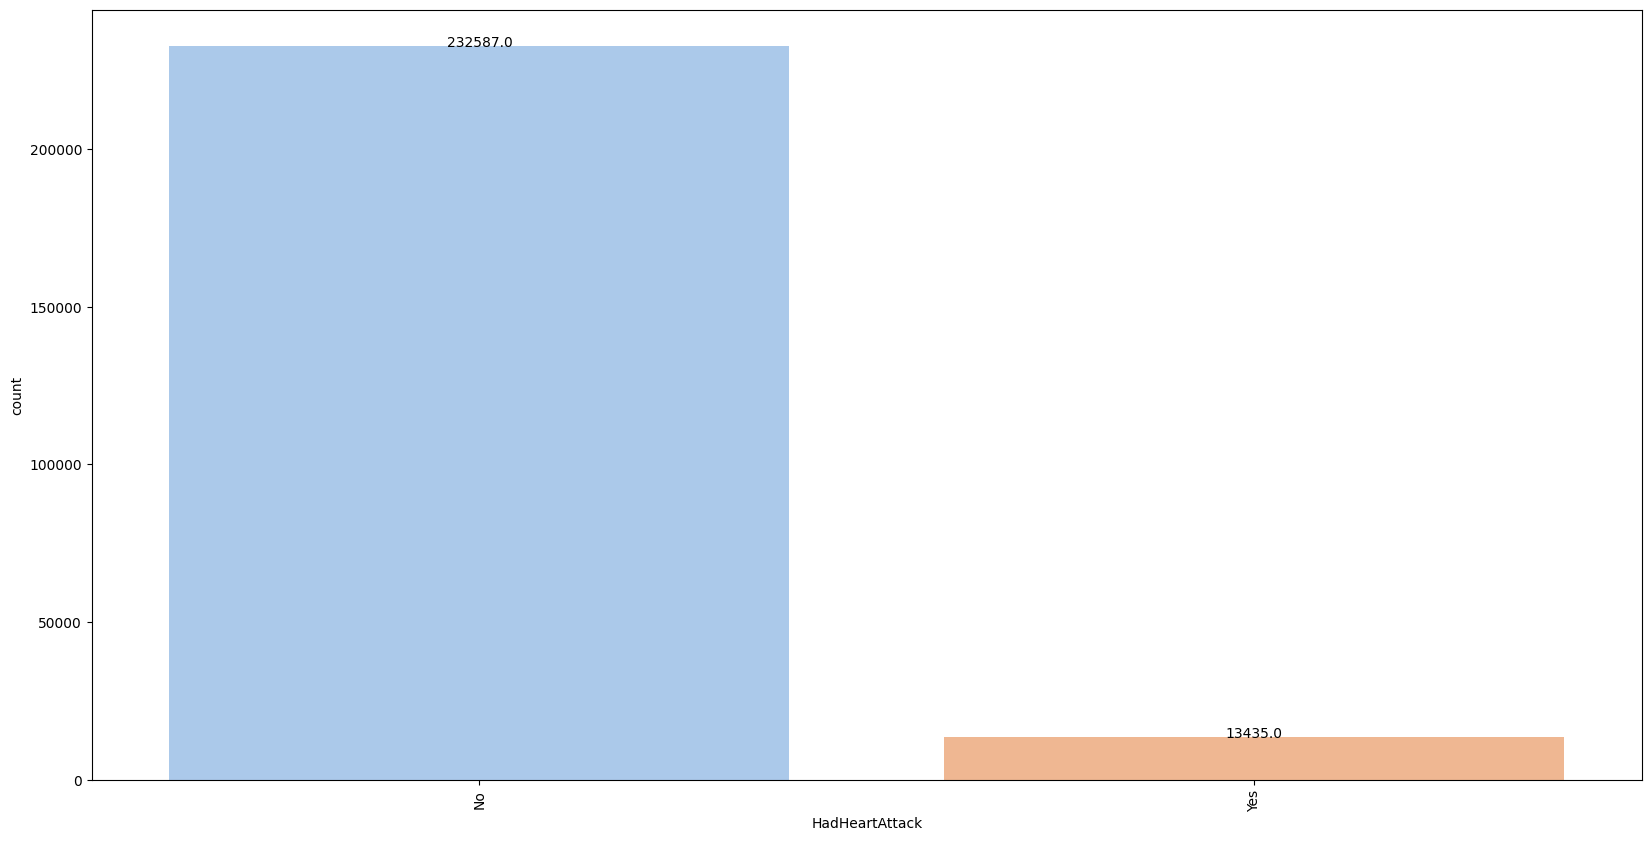

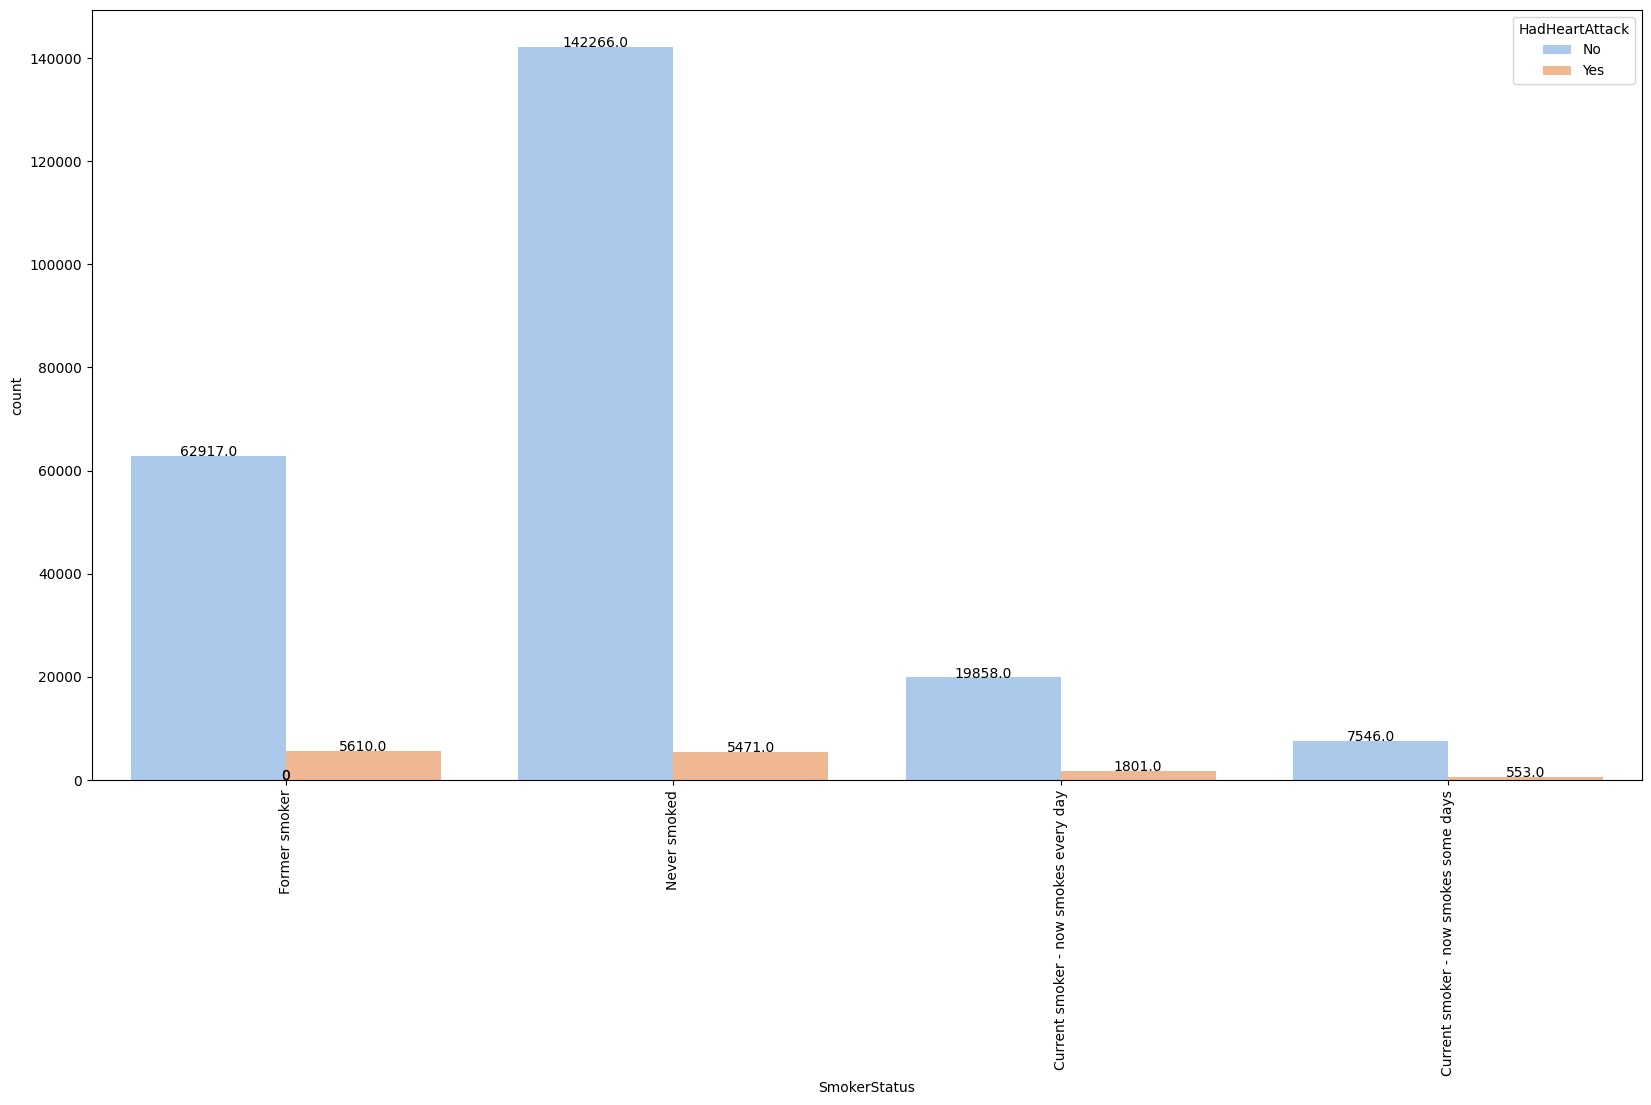

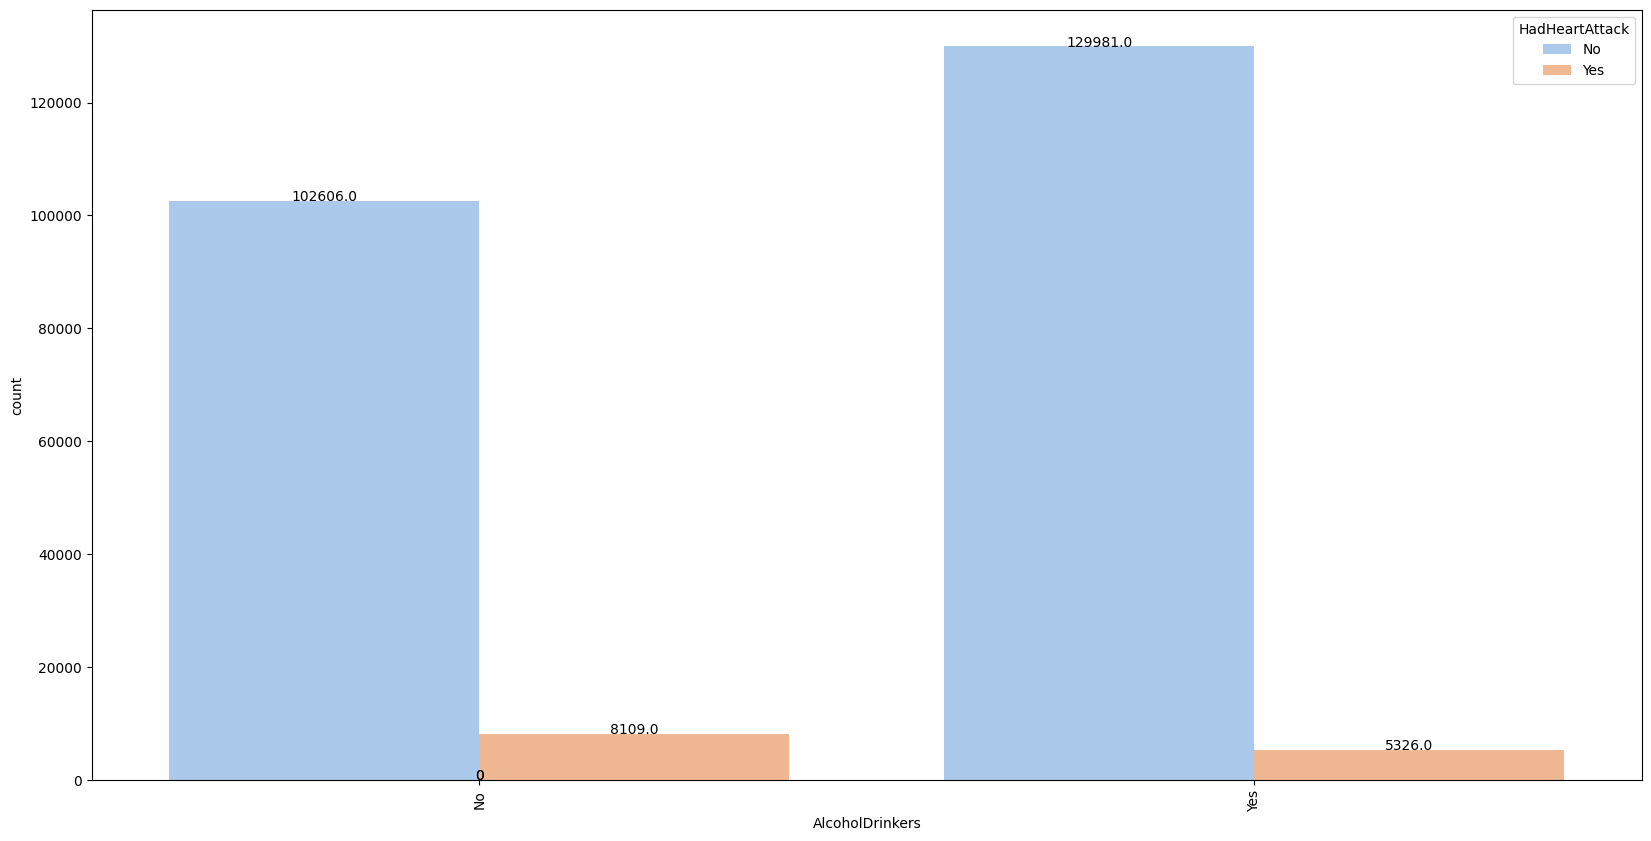

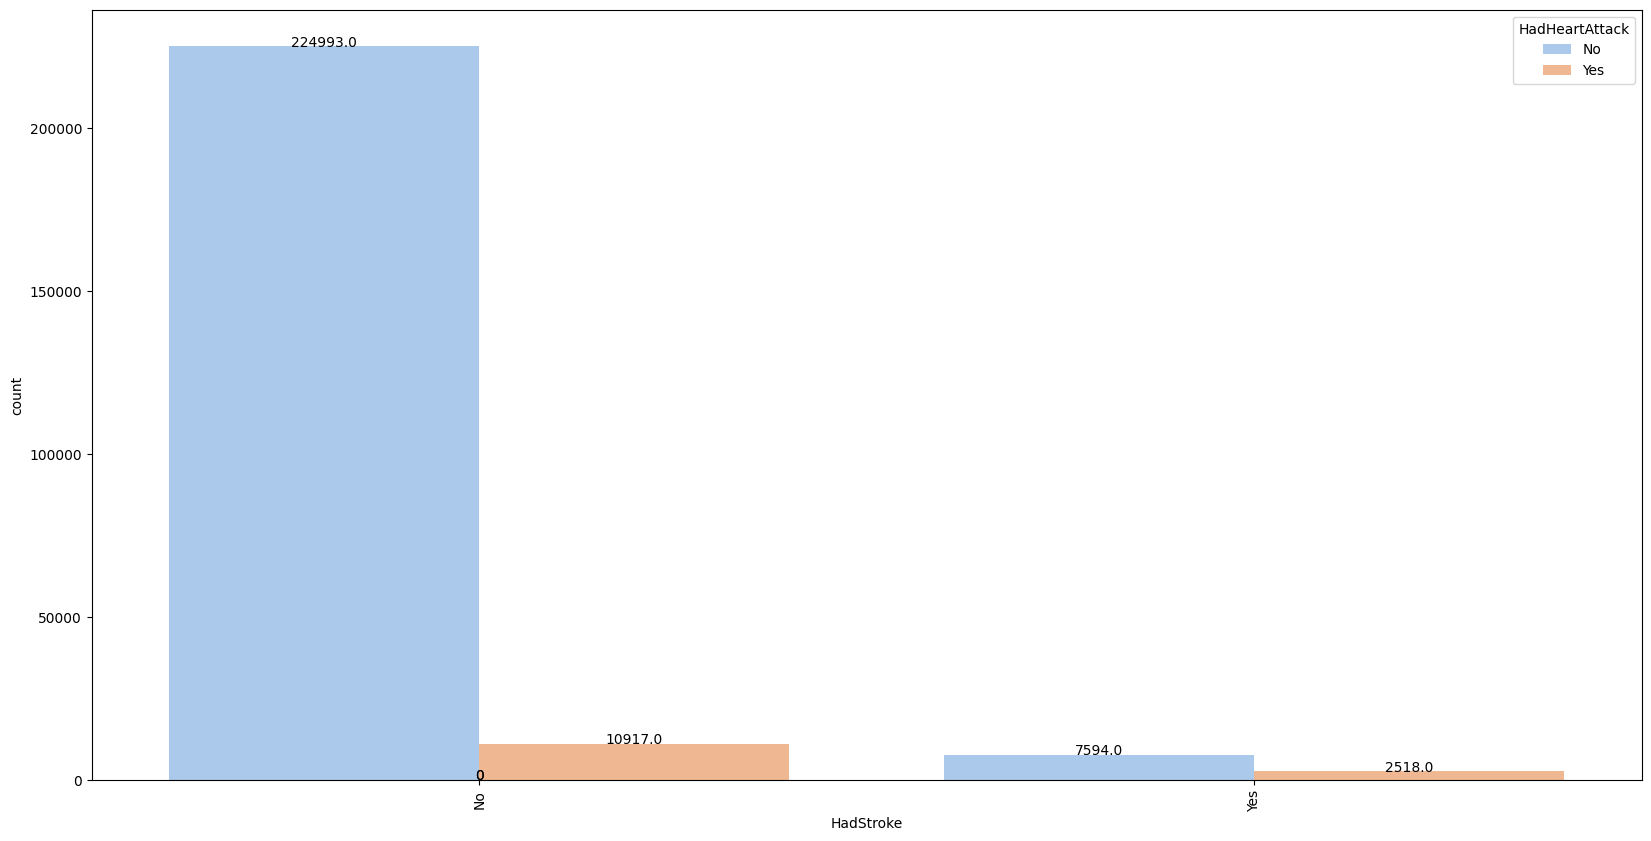

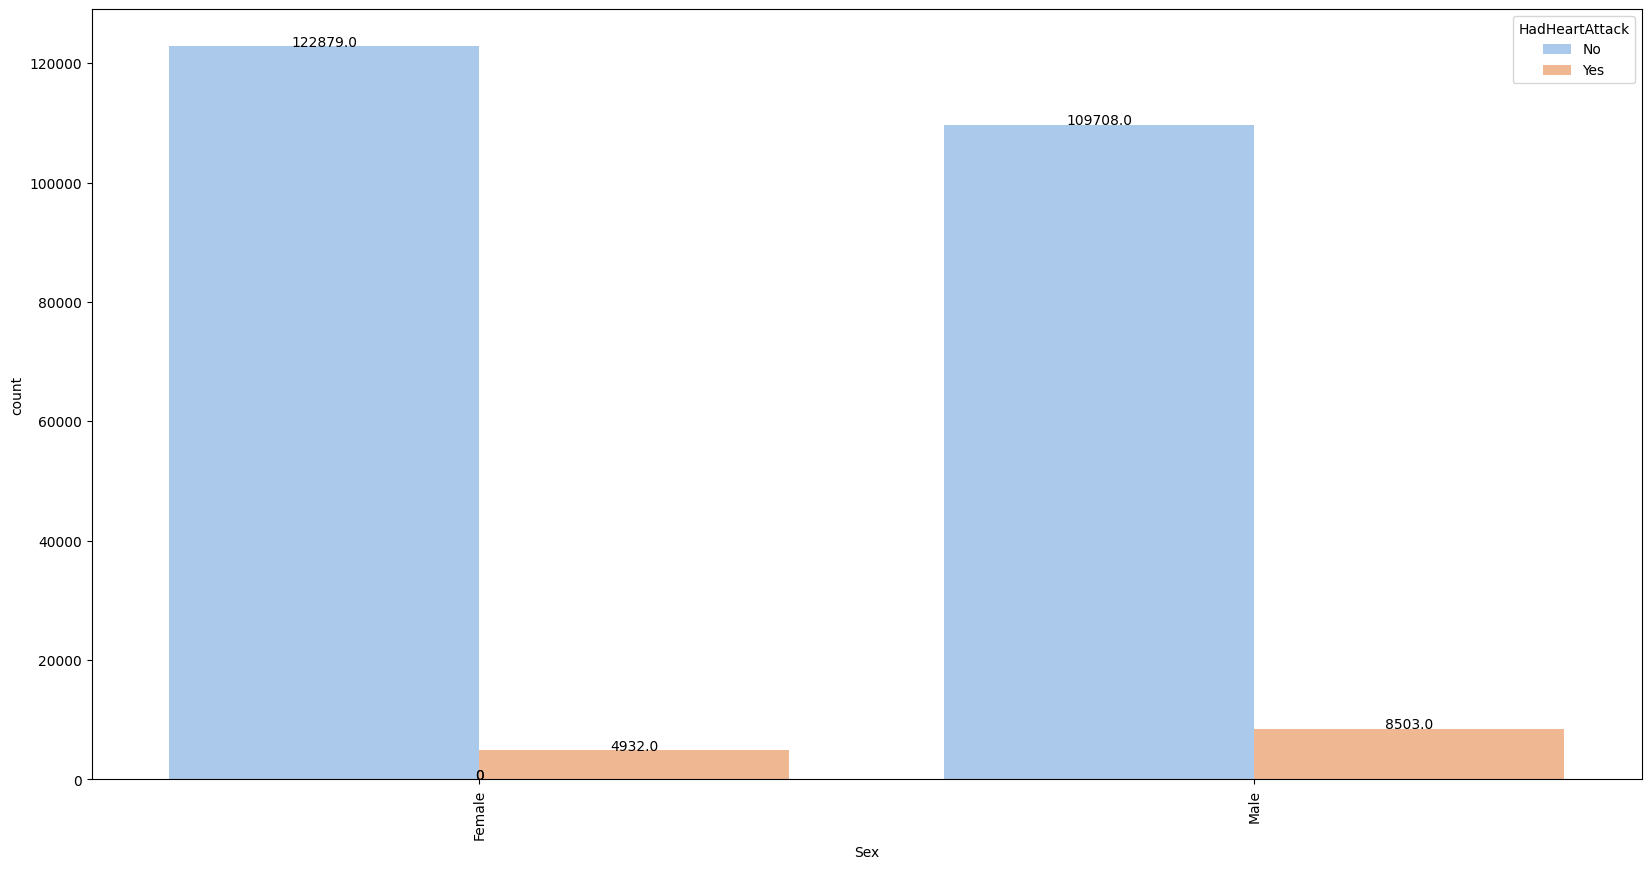

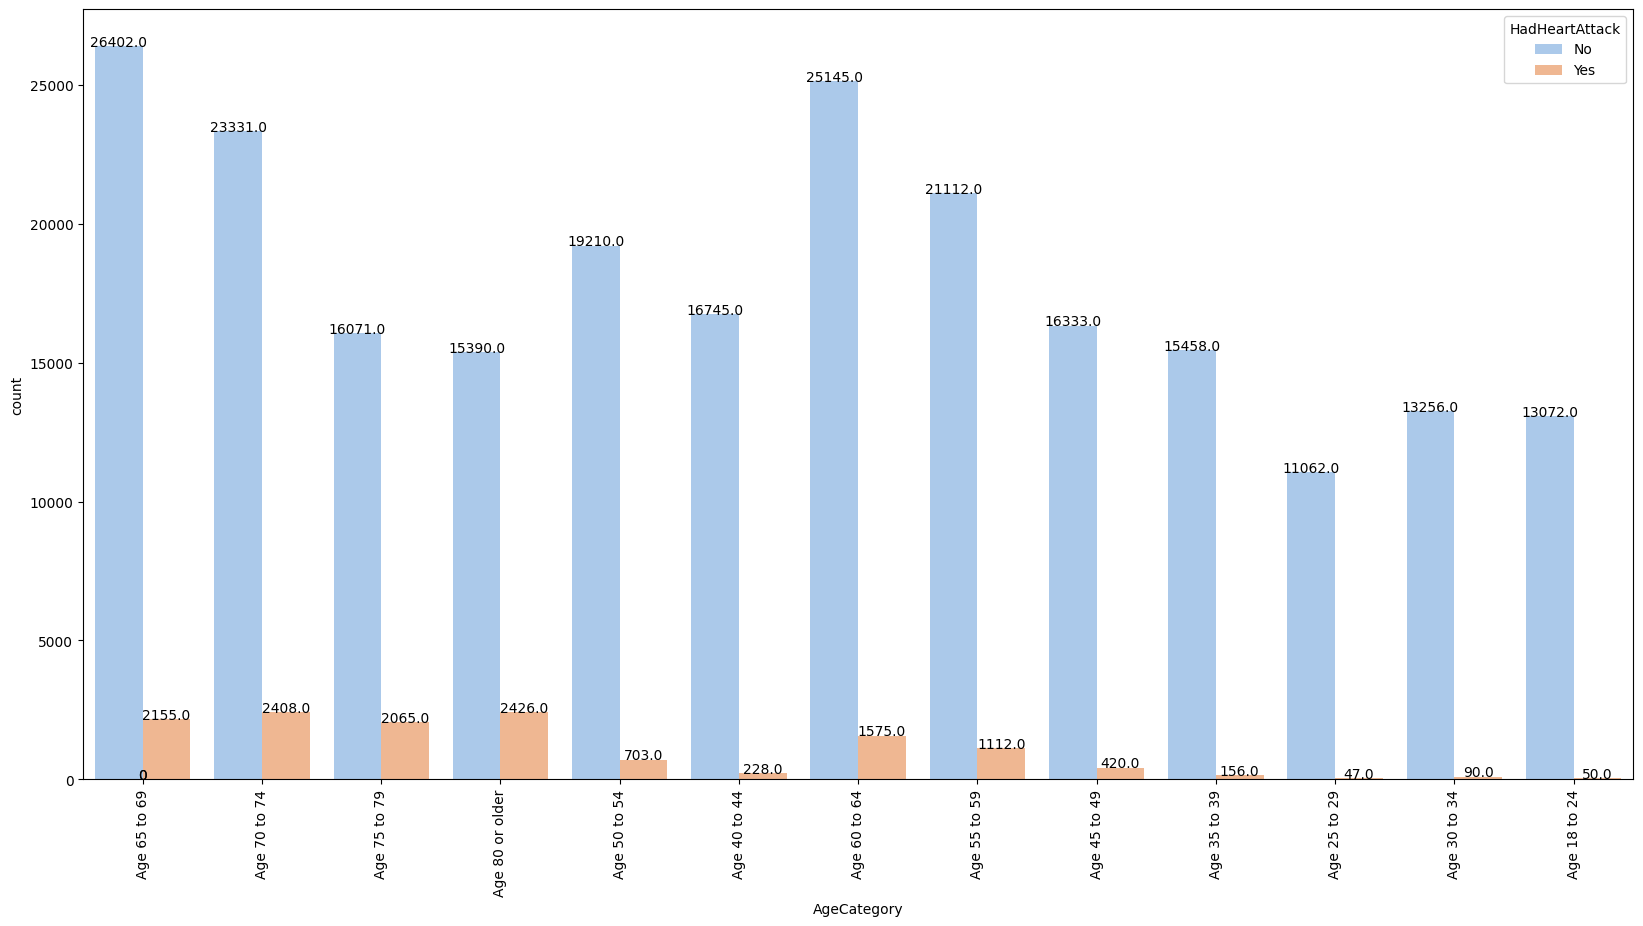

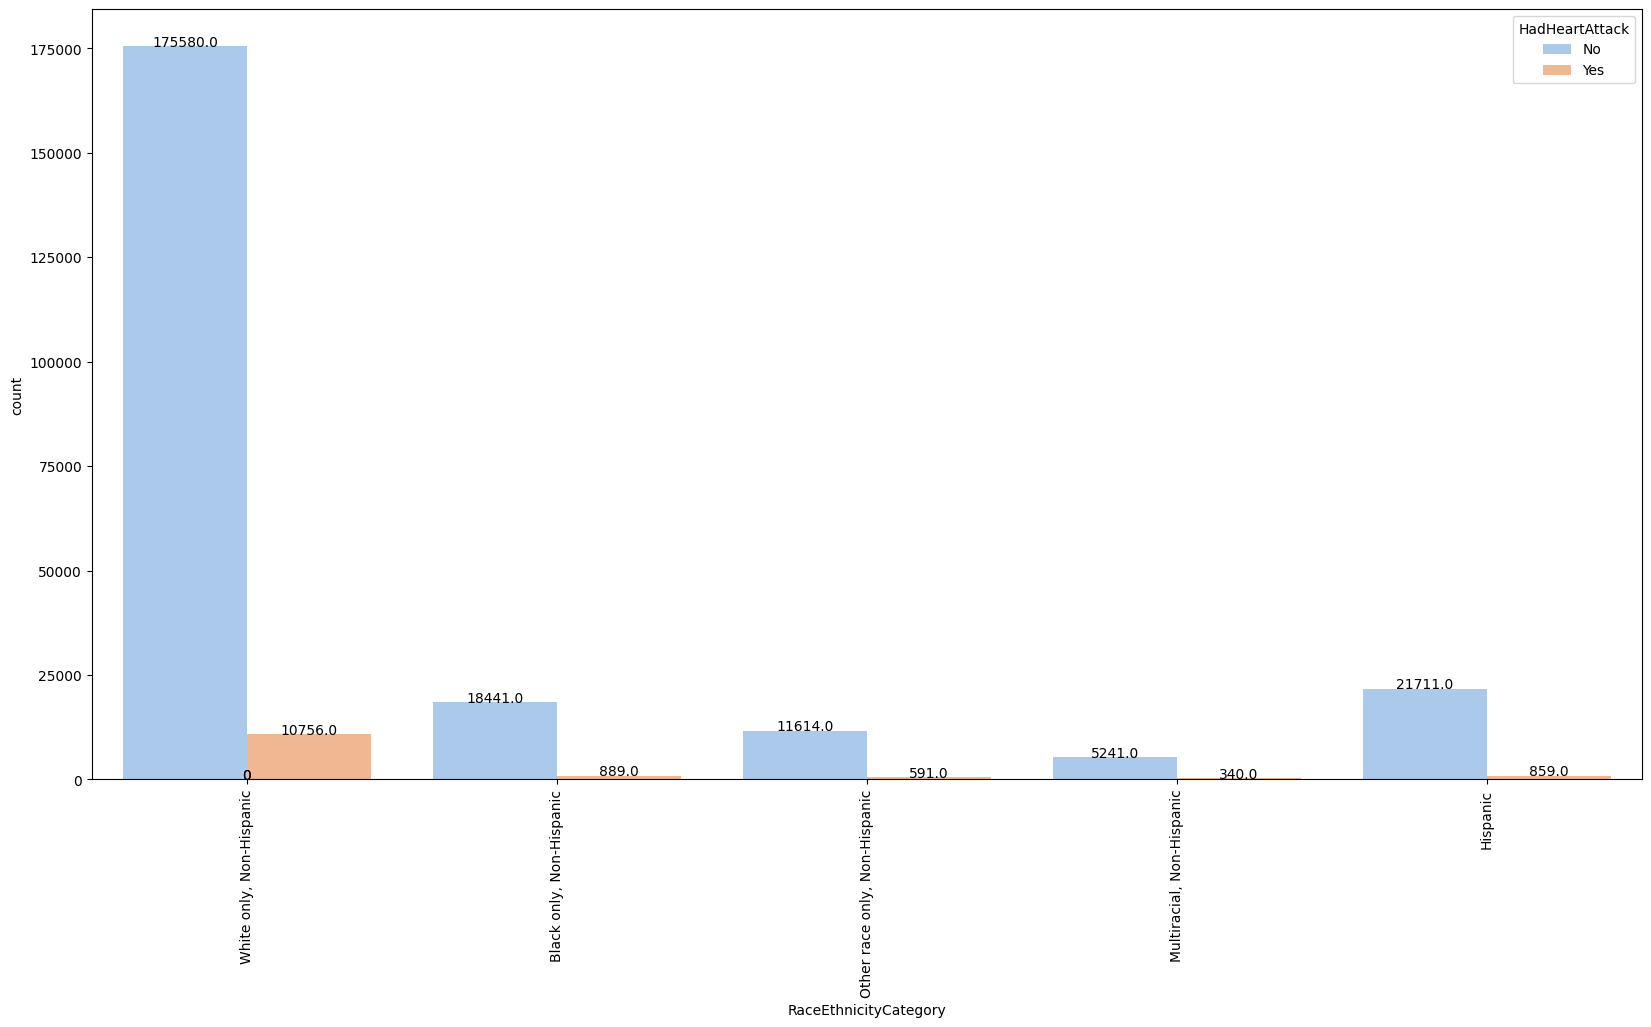

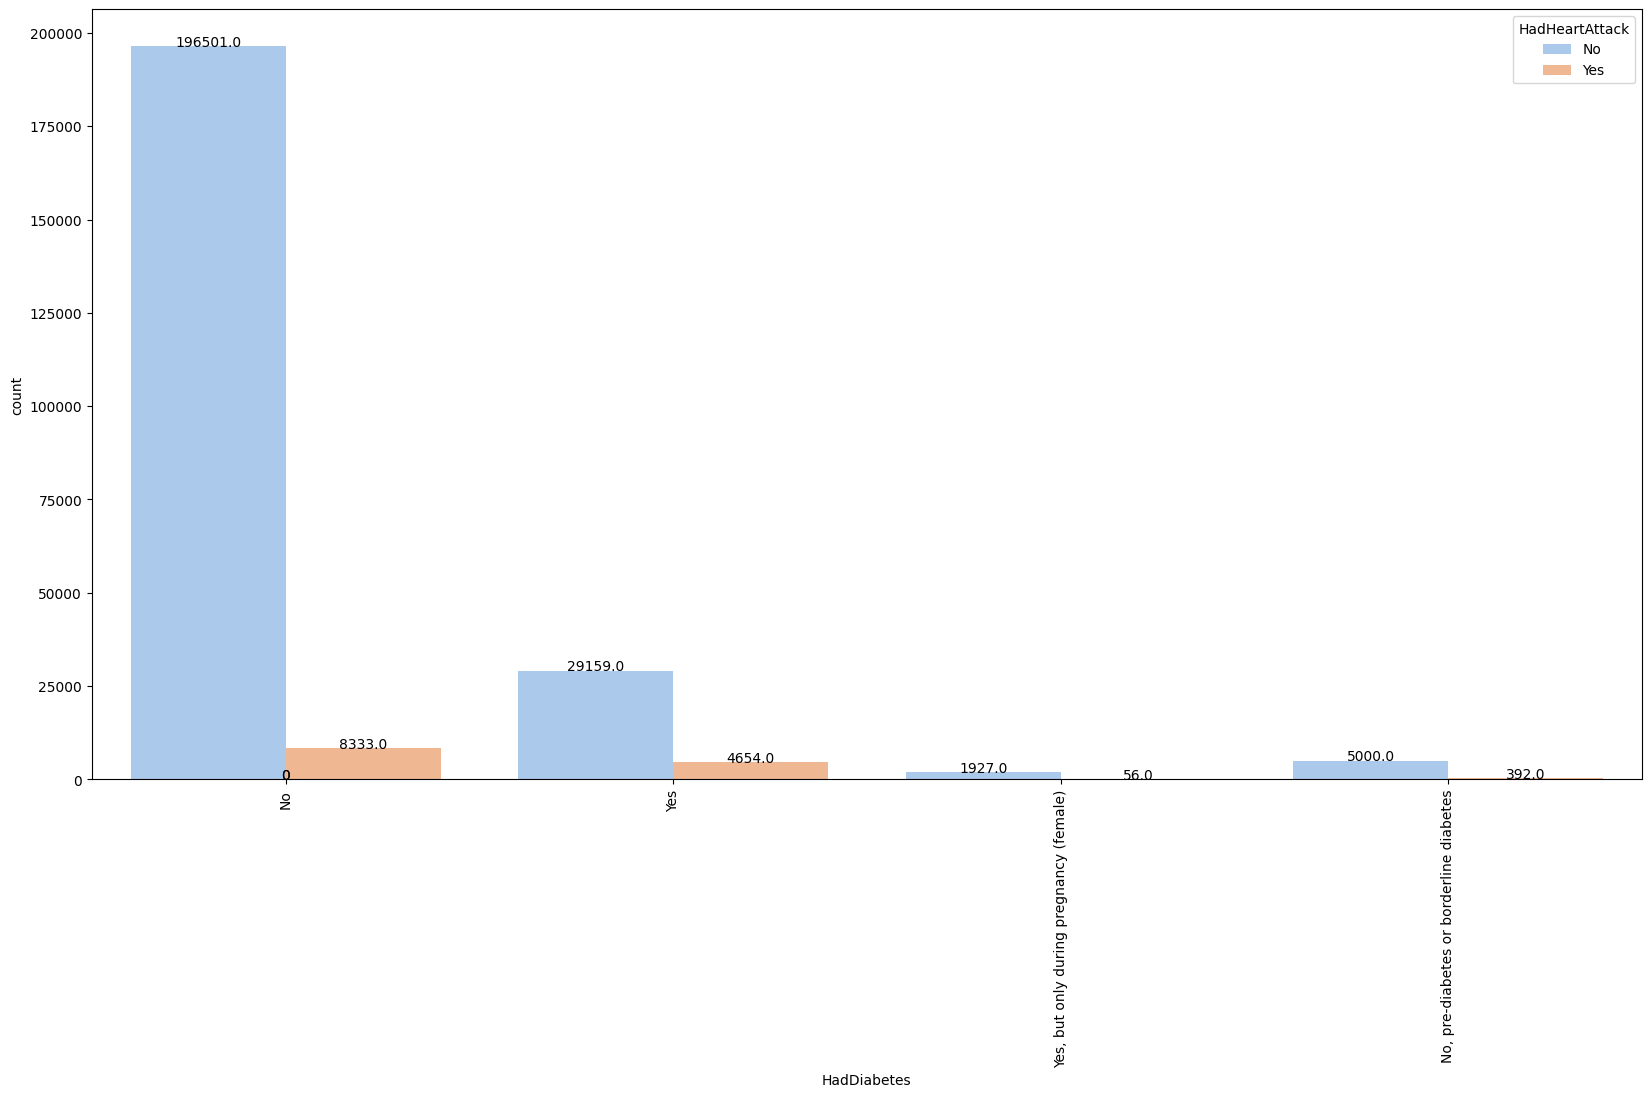

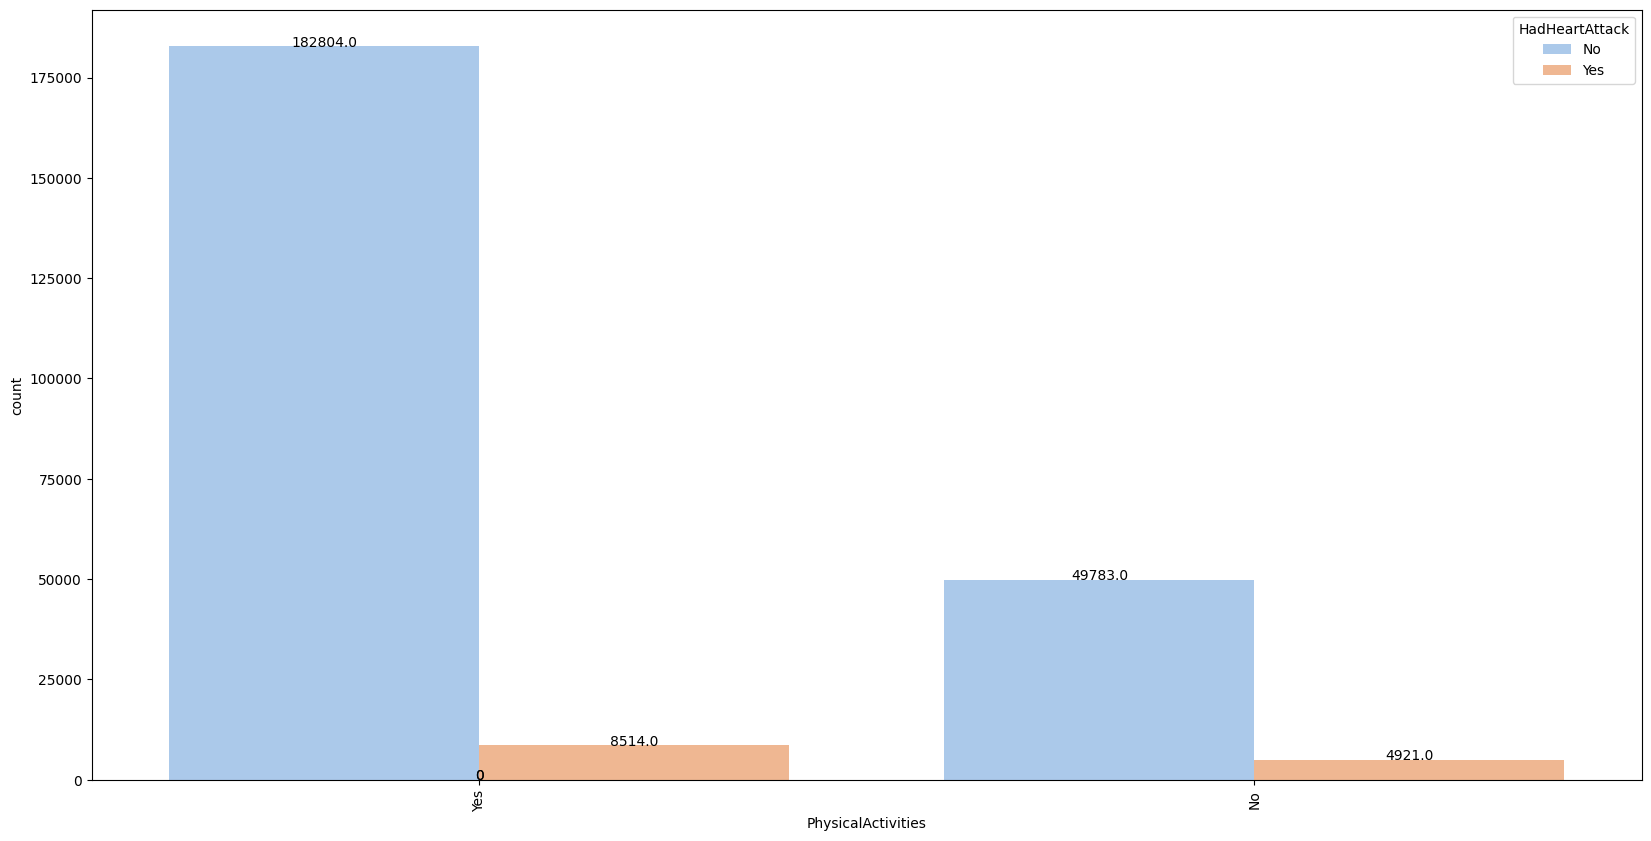

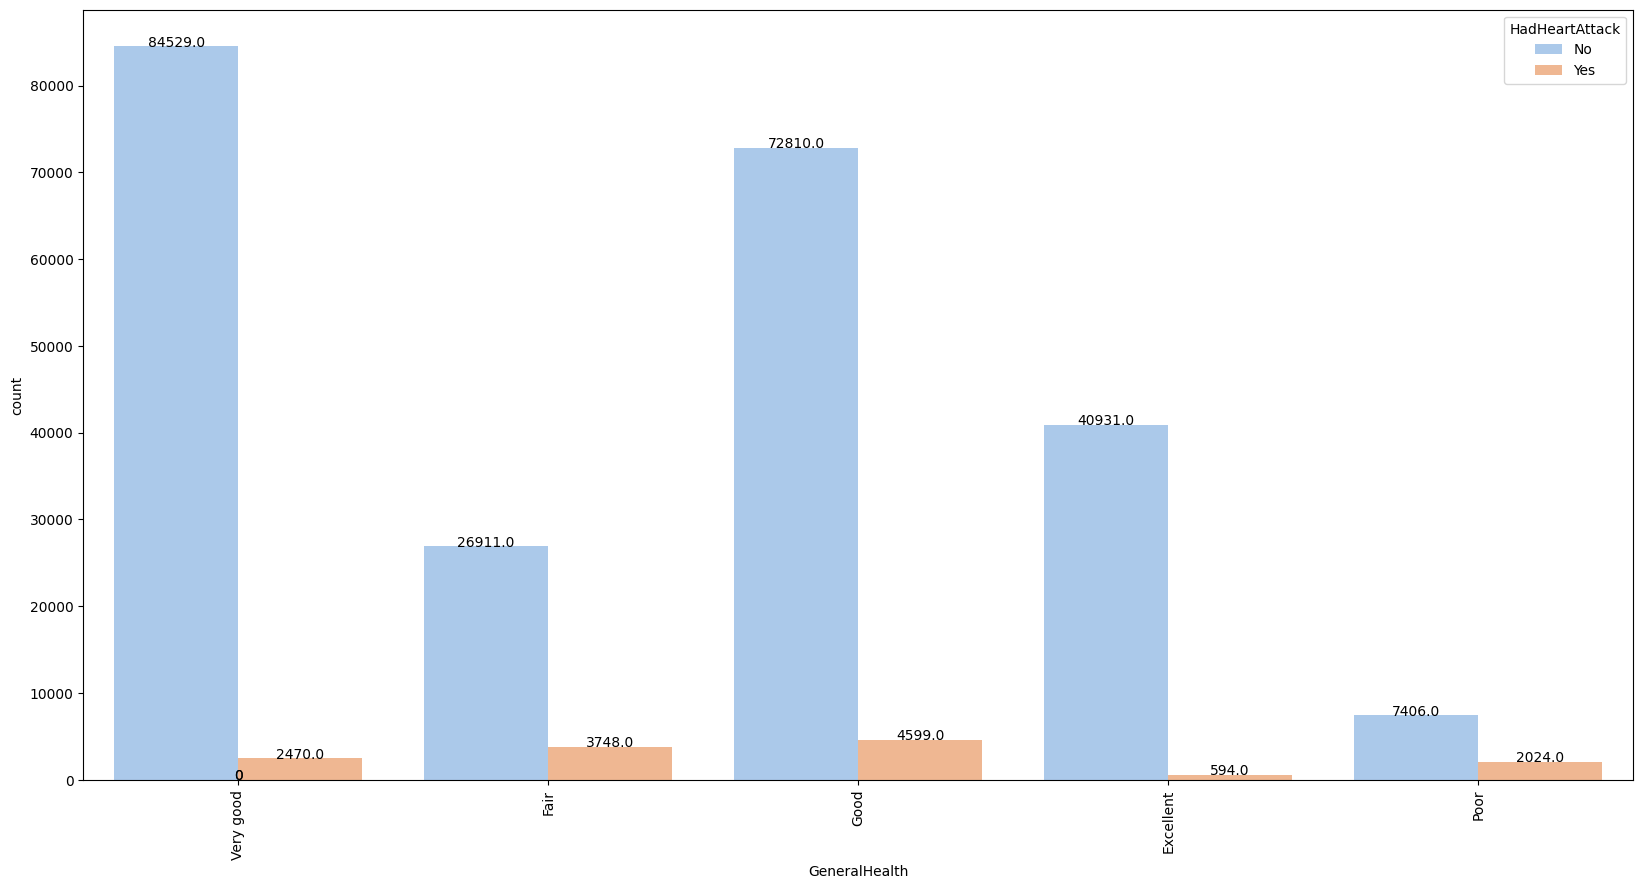

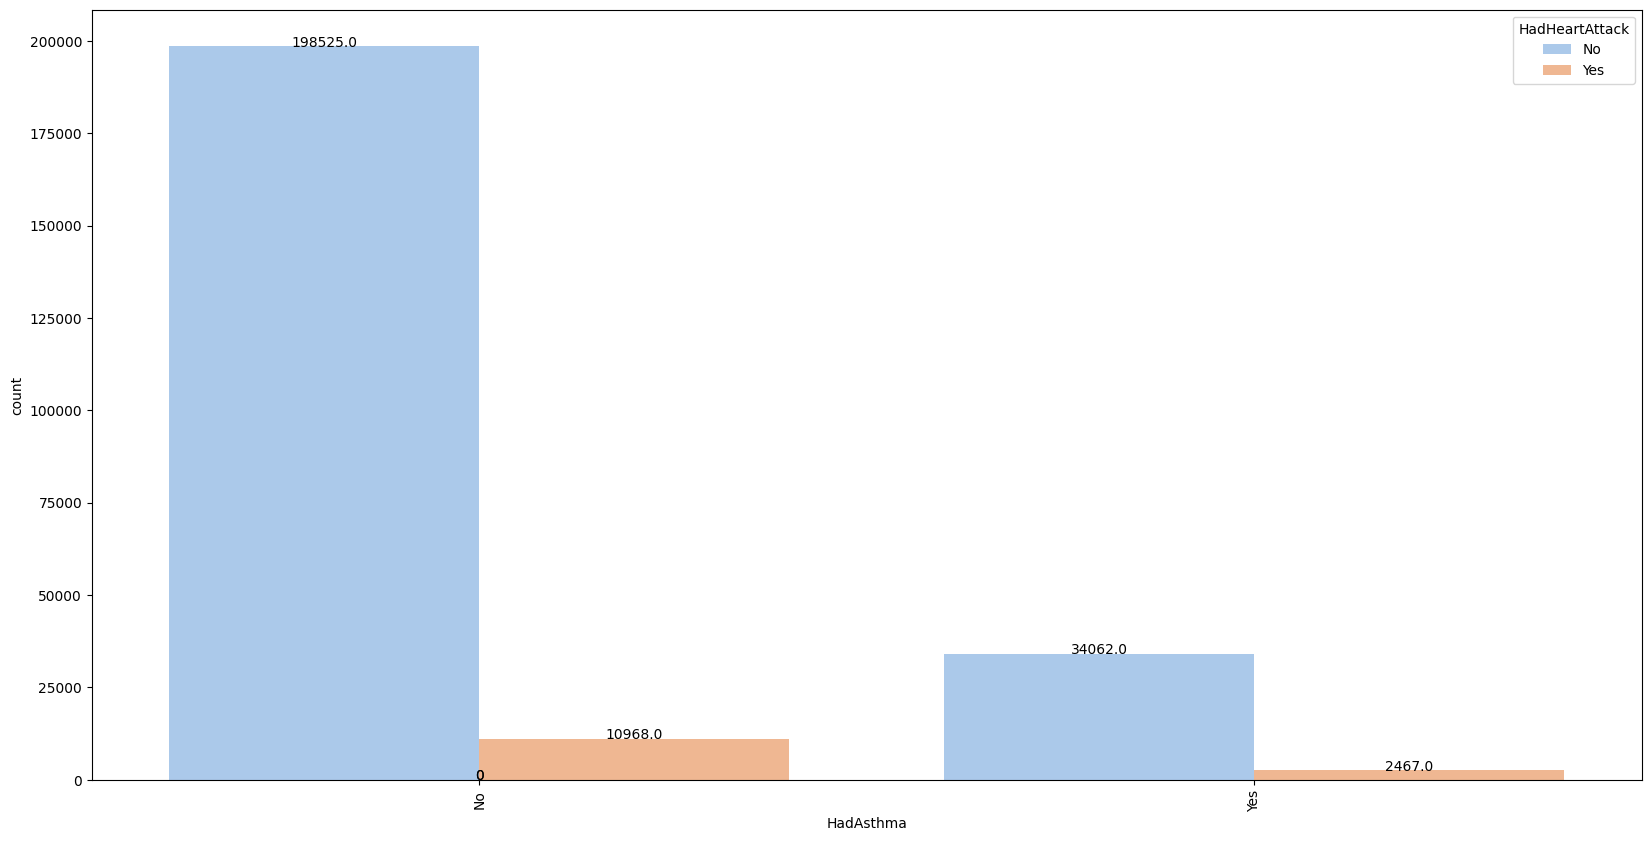

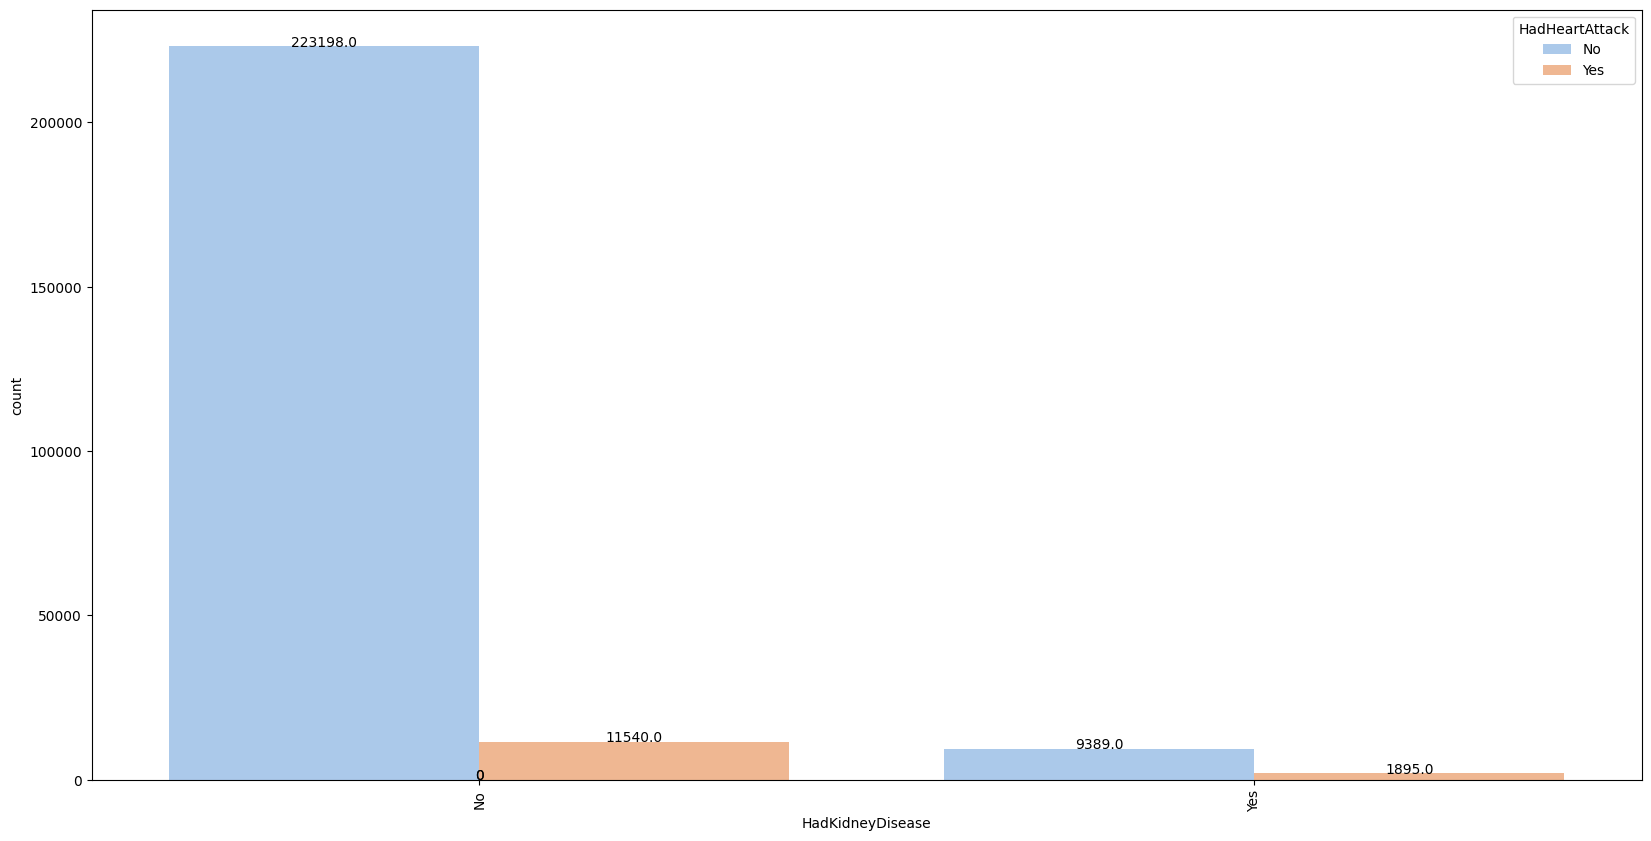

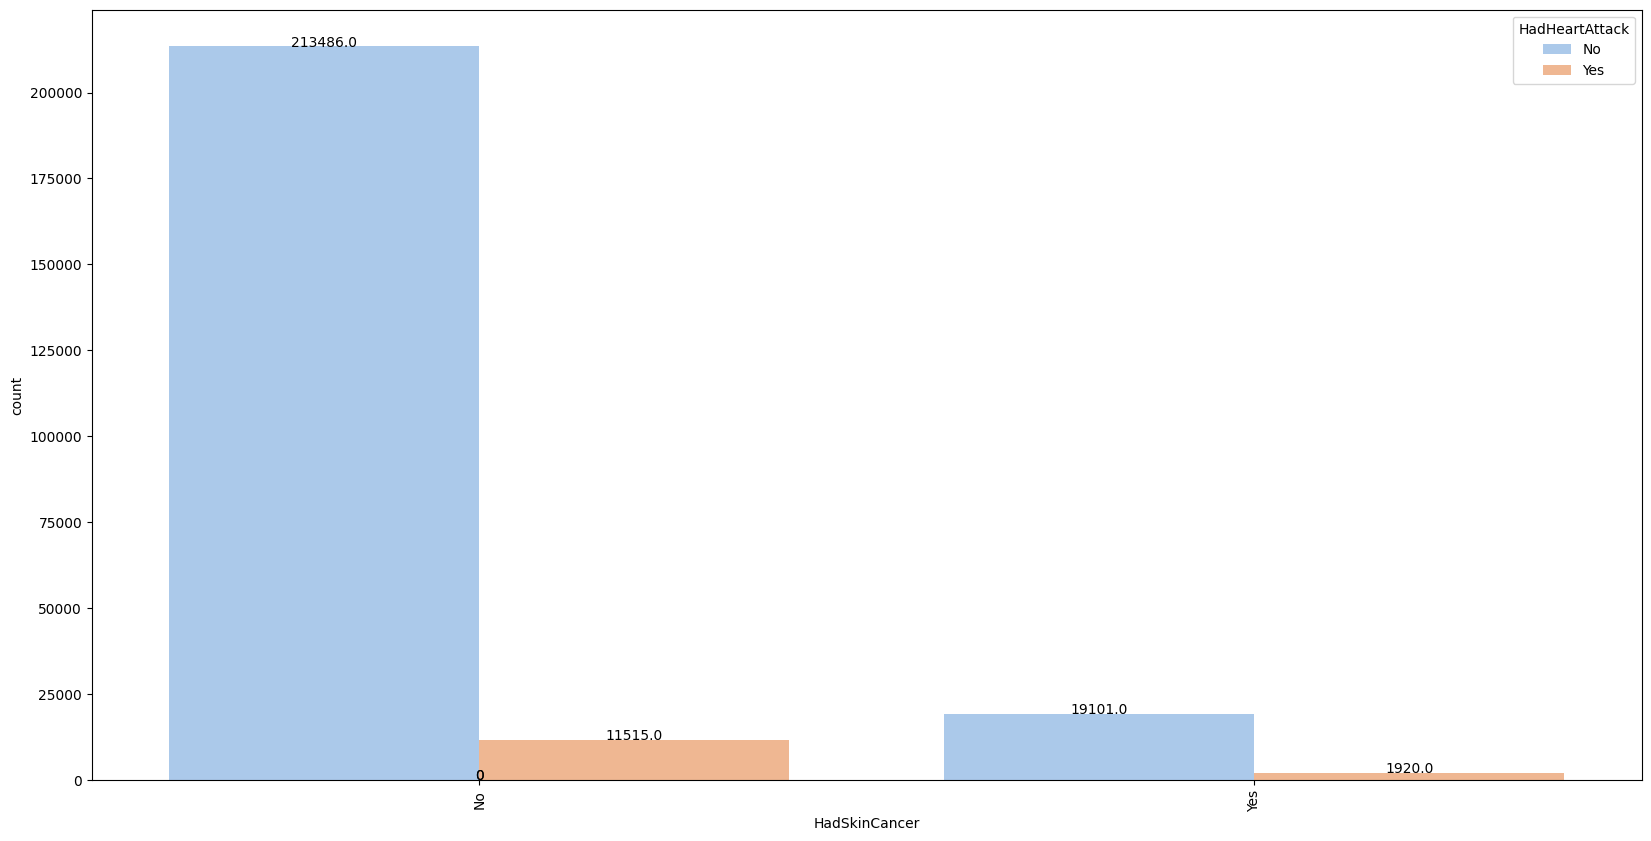

In [62]:
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(20,10))
  graph = sns.countplot(ax=ax1,x = feature , data = df,hue='HadHeartAttack',palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

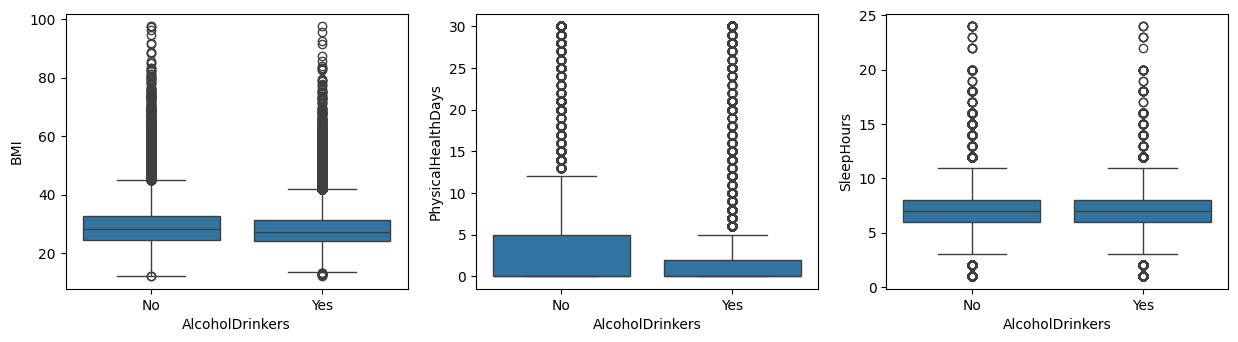

In [63]:
plt.figure(figsize=(15,25))
for i, feature in enumerate(numeric_features, start=1):
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature], x = df['AlcoholDrinkers'])

In [64]:
selected_df = df.loc[:, list(numeric_features + categorical_features)]

encoder = preprocessing.LabelEncoder()
for key in categorical_features:
    selected_df[key] = encoder.fit_transform(selected_df[key])

scaled_df = (selected_df-selected_df.min())/(selected_df.max()-selected_df.min())
scaled_df

,BMI,PhysicalHealthDays,SleepHours,HadHeartAttack,SmokerStatus,AlcoholDrinkers,HadStroke,Sex,AgeCategory,RaceEthnicityCategory,HadDiabetes,PhysicalActivities,GeneralHealth,HadAsthma,HadKidneyDisease,HadSkinCancer
342,0.186500,0.133333,0.347826,0.0,0.666667,0.0,0.0,0.0,0.750000,1.0,0.000000,1.0,1.00,0.0,0.0,0.0
343,0.211491,0.000000,0.217391,0.0,0.666667,0.0,0.0,1.0,0.833333,1.0,0.666667,1.0,1.00,0.0,0.0,0.0
345,0.229359,0.000000,0.304348,0.0,0.666667,1.0,0.0,1.0,0.916667,1.0,0.000000,0.0,1.00,0.0,0.0,0.0
346,0.225388,0.166667,0.347826,0.0,1.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,0.25,0.0,0.0,1.0
347,0.245825,0.100000,0.173913,0.0,1.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,0.50,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445117,0.236599,0.000000,0.217391,0.0,1.000000,1.0,0.0,1.0,0.666667,1.0,0.000000,1.0,1.00,0.0,0.0,0.0
445123,0.143875,0.000000,0.260870,0.0,1.000000,0.0,0.0,0.0,0.083333,0.0,0.000000,1.0,0.25,0.0,0.0,0.0
445124,0.208338,0.000000,0.260870,0.0,1.000000,1.0,1.0,1.0,0.750000,0.5,0.666667,1.0,0.50,0.0,0.0,0.0
445128,0.194324,0.066667,0.260870,0.0,1.000000,0.0,0.0,0.0,0.500000,0.0,0.000000,1.0,0.00,0.0,0.0,0.0


Text(0.5, 1.0, 'Матрица корреляции')

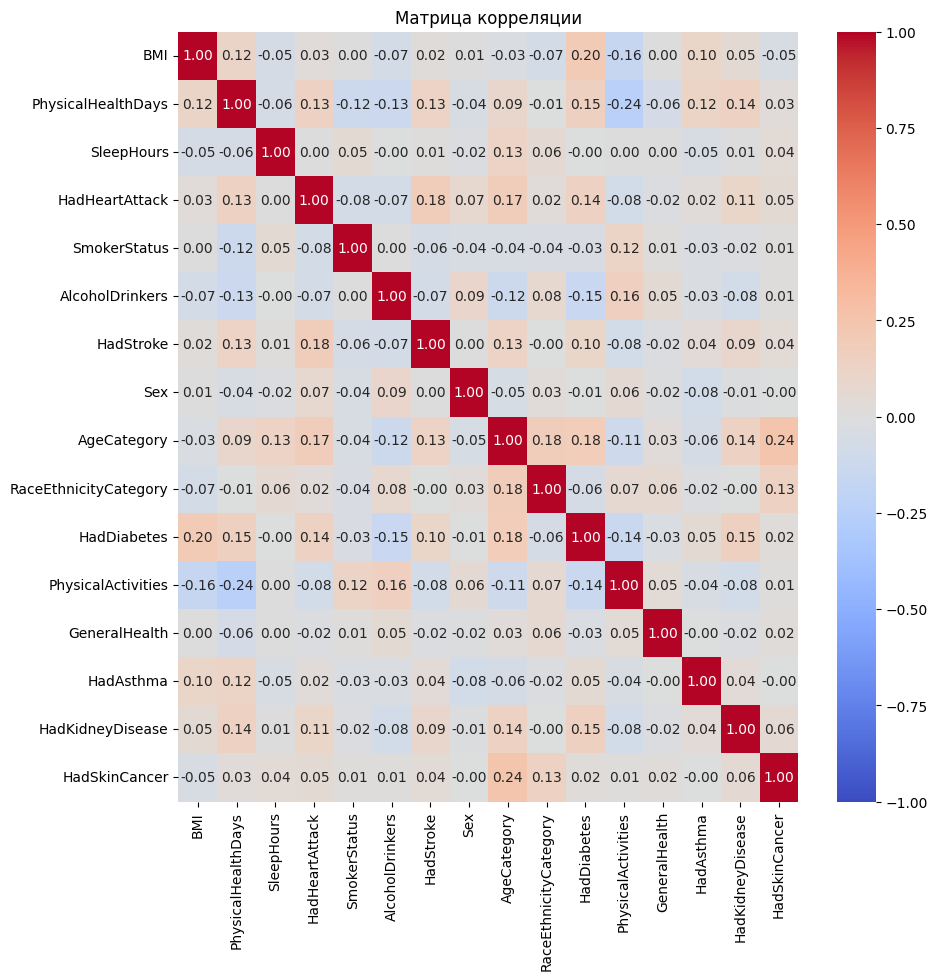

In [65]:
plt.figure(figsize=(10, 10))
sns.heatmap(selected_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, center= 0)
plt.title("Матрица корреляции")

## Регрессия

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import numpy as np

In [67]:
Y = selected_df["HadHeartAttack"]
X = selected_df.drop("HadHeartAttack", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

## Линейная регрессия

In [68]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_model.coef_

array([-1.03657055e-04,  2.04450843e-03, -6.67443915e-04, -1.09683446e-02,
       -1.37086412e-02,  1.54967471e-01,  3.87739990e-02,  8.22741277e-03,
        1.47359512e-03,  2.15641175e-02, -1.35260662e-02, -1.79903222e-03,
        1.08062375e-02,  5.71584550e-02,  3.11005707e-03])

## Регуляризация

### Регуляризация L1 (Lasso)

Добавление суммы абсолютных значений коэффициентов к функции оценки. Этот метод может принудительно обнулить коэффициенты, что затем может быть средством выбора показателей.

In [69]:
lasso = Lasso()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'max_iter': [100, 500, 1000],
    'tol': [1e-4, 1e-3, 1e-2]
}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
lasso_model = grid_search.best_estimator_
lasso_model.coef_

{'alpha': 0.001, 'max_iter': 100, 'tol': 0.001}


array([ 3.49892305e-07,  2.28504606e-03, -1.92101842e-04, -1.03968959e-02,
       -1.03703709e-02,  1.31674548e-01,  3.40671047e-02,  8.59867534e-03,
        6.12281896e-04,  2.12450512e-02, -8.43576628e-03, -1.48668759e-03,
        3.07886598e-03,  3.62225856e-02,  0.00000000e+00])

### Регуляризация L2 (Ridge)
Добавление суммы квадратов значений коэффициентов к функции оценки.

In [73]:
ridge = Ridge()
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'max_iter': [100, 500, 1000, 15000],
    'tol': [1e-4, 1e-3, 1e-2],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
ridge_model = grid_search.best_estimator_
ridge_model.coef_

/Users/linearlys/Documents/Учеба/Машинное обучение/source/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'alpha': 0.1, 'max_iter': 1000, 'solver': 'sag', 'tol': 0.01}


array([ 9.50666768e-05,  2.02853392e-03, -6.88264991e-04, -1.09207673e-02,
       -1.37215330e-02,  1.56156693e-01,  3.88669218e-02,  8.19500946e-03,
        1.68249590e-03,  2.16895169e-02, -1.37818282e-02, -1.96434012e-03,
        1.05208270e-02,  5.70632254e-02,  3.12433690e-03])

## Оценки качества регрессии
### Средняя квадратичная ошибка (англ. Mean Squared Error, MSE)
MSE применяется в ситуациях, когда нам надо подчеркнуть большие ошибки и выбрать модель, которая дает меньше больших ошибок прогноза. Грубые ошибки становятся заметнее за счет того, что ошибку прогноза мы возводим в квадрат. И модель, которая дает нам меньшее значение среднеквадратической ошибки, можно сказать, что у этой модели меньше грубых ошибок.
### Cредняя абсолютная ошибка (англ. Mean Absolute Error, MAE)
Среднеквадратичный функционал сильнее штрафует за большие отклонения по сравнению со среднеабсолютным, и поэтому более чувствителен к выбросам. При использовании любого из этих двух функционалов может быть полезно проанализировать, какие объекты вносят наибольший вклад в общую ошибку — не исключено, что на этих объектах была допущена ошибка при вычислении признаков или целевой величины.
### Коэффициент детерминации (R2)
Коэффициент детерминации измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной. Фактически, данная мера качества — это нормированная среднеквадратичная ошибка. Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.
### Средняя абсолютная процентная ошибка (англ. Mean Absolute Percentage Error, MAPE)
Это коэффициент, не имеющий размерности, с очень простой интерпретацией. Его можно измерять в долях или процентах. Если у вас получилось, например, что MAPE=11.4%, то это говорит о том, что ошибка составила 11,4% от фактических значений. Основная проблема данной ошибки — нестабильность.
### Корень из средней квадратичной ошибки (англ. Root Mean Squared Error, RMSE)
Примерно такая же проблема, как и в MAPE: так как каждое отклонение возводится в квадрат, любое небольшое отклонение может значительно повлиять на показатель ошибки. Стоит отметить, что существует также ошибка MSE, из которой RMSE как раз и получается путем извлечения корня.
### Средняя абсолютная масштабированная ошибка (англ. Mean absolute scaled error, MASE)
Эта величина, по сути, показывает, насколько обучающая выборка предсказуема. Она может быть равна нулю только в том случае, когда все значения в обучающей выборке равны друг другу, что соответствует отсутствию каких-либо изменений в ряде данных, ситуации на практике почти невозможной. Кроме того, если ряд имеет тенденцию к росту либо снижению, его первые разности будут колебаться около некоторого фиксированного уровня.

LinearRegression()
MSE (Средняя квадратичная ошибка): 0.046903821591972324
MAE (Cредняя абсолютная ошибка): 0.10224697848817509
R2 (Коэффициент детерминации): 0.08199693054676438
MAPE (Средняя абсолютная процентная ошибка): 250126407733572.84
RMSE (Корень из средней квадратичной ошибки): 0.2165729013334132
MASE (Средняя абсолютная масштабированная ошибка): 0.9851342182102738
----------------------------------------------------
Lasso(alpha=0.001, max_iter=100, tol=0.001)
MSE (Средняя квадратичная ошибка): 0.046953025017302794
MAE (Cредняя абсолютная ошибка): 0.10194543119385023
R2 (Коэффициент детерминации): 0.08103391956071038
MAPE (Средняя абсолютная процентная ошибка): 247274097515214.38
RMSE (Корень из средней квадратичной ошибки): 0.21668646708390166
MASE (Средняя абсолютная масштабированная ошибка): 0.9822288555047881
----------------------------------------------------
Ridge(alpha=0.1, max_iter=1000, solver='sag', tol=0.01)
MSE (Средняя квадратичная ошибка): 0.046906001221432576


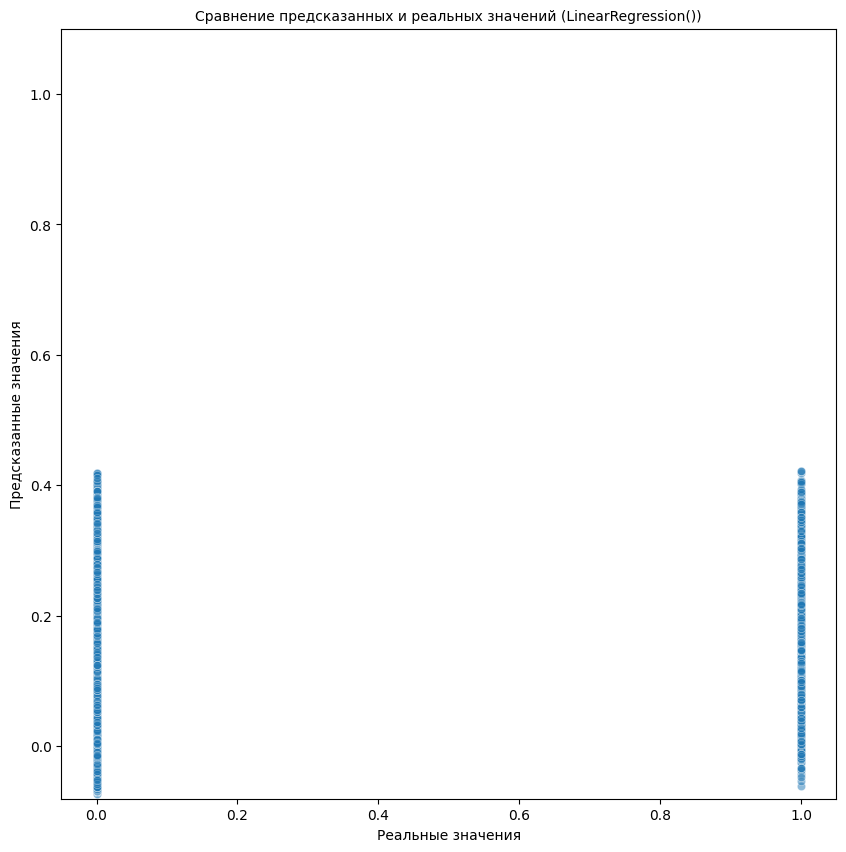

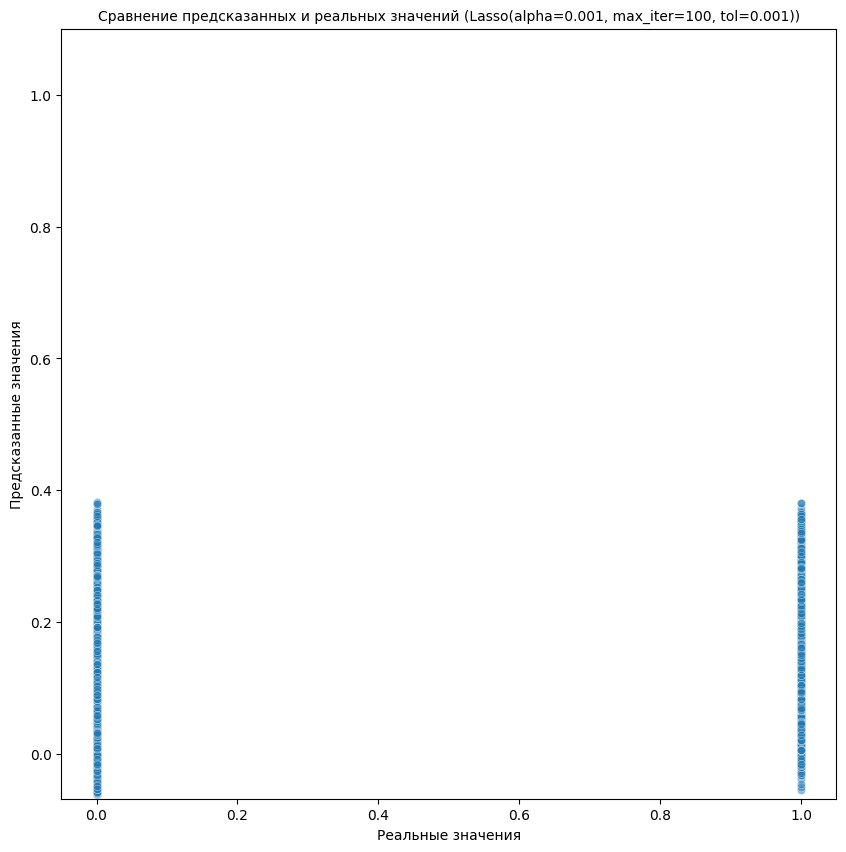

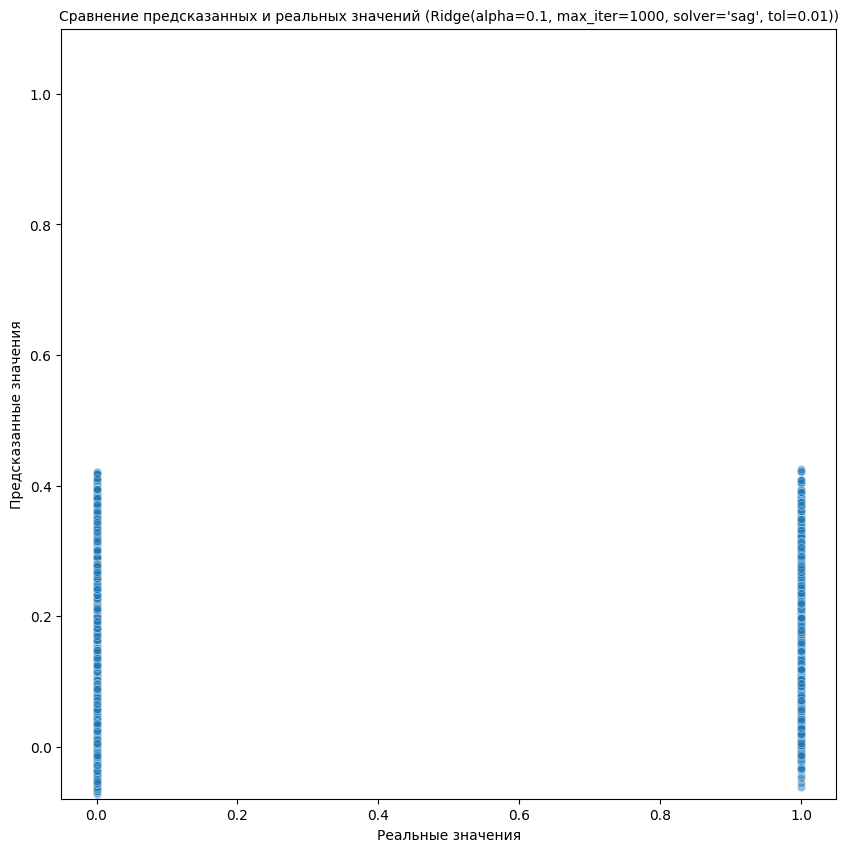

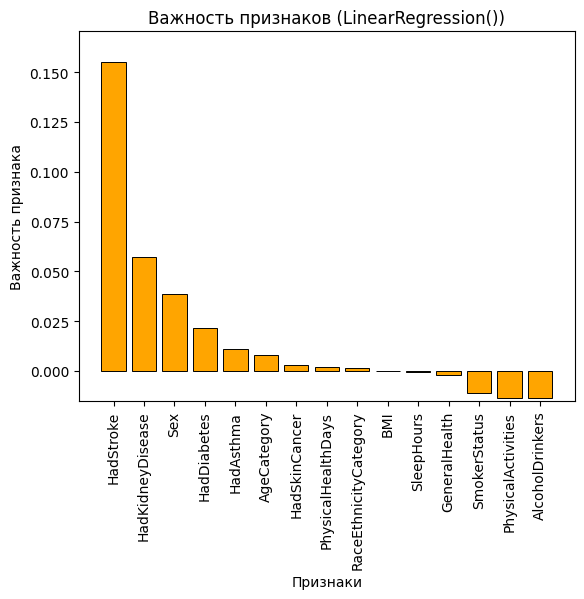

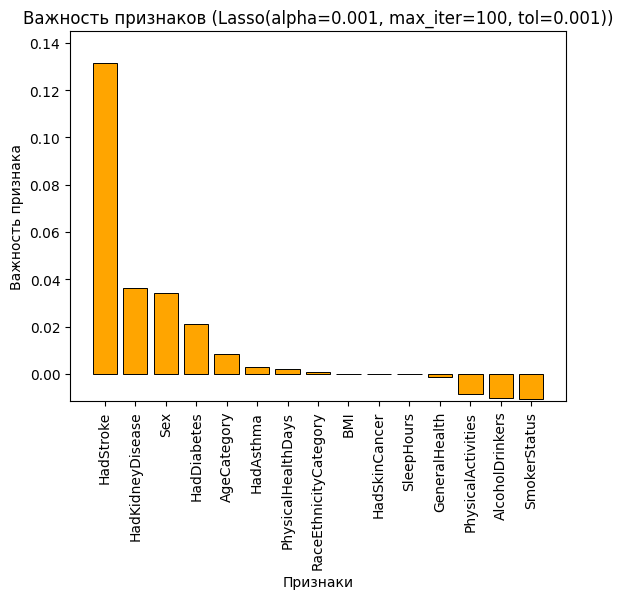

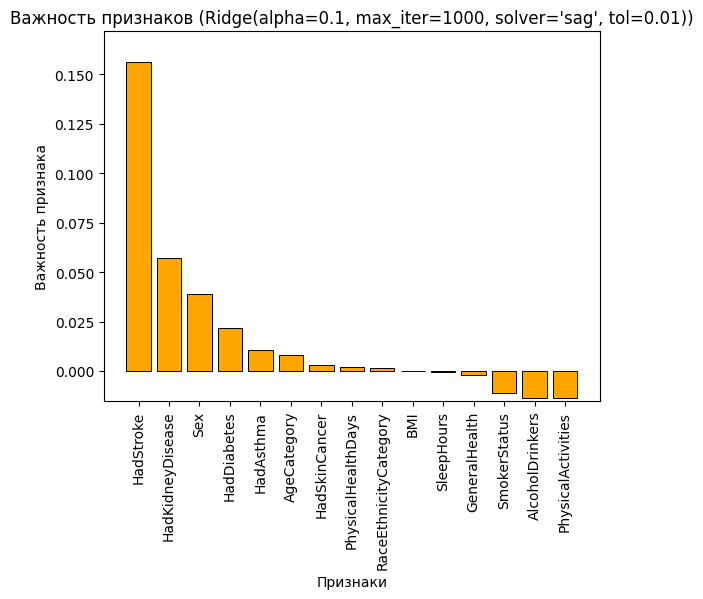

In [77]:
def compare_true_and_predict_values(y_true, y_pred, name):
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x = y_true, y = y_pred, alpha = 0.5)
    plt.ylim((min(y_pred) * 1.1, max(y_true) * 1.1))
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказанные значения')
    plt.title(f'Сравнение предсказанных и реальных значений ({name})', size=10)
    plt.show()

def visualize_important_features(model, feature_names):
    coef = model.coef_
    sorted_i = np.argsort(coef)[::-1]
    sorted_feature_names = [feature_names[i] for i in sorted_i]
    sorted_feature_importance = coef[sorted_i]
    plt.bar(sorted_feature_names, sorted_feature_importance, color='orange', edgecolor='black', linewidth=0.7)
    plt.xlabel('Признаки')
    plt.ylabel('Важность признака')
    plt.title(f'Важность признаков ({model})')
    plt.xticks(rotation=90)
    plt.ylim(min(coef) * 1.1, max(coef) * 1.1)
    plt.show()

def mean_absolute_scaled_error(y_true, y_pred):
    e_t = y_true - y_pred
    scale = mean_absolute_error(Y_train[1:], Y_train[:-1])
    return np.mean(np.abs(e_t / scale))

def print_regression_metrics(y_true, y_pred):
    metrics = {
        'MSE (Средняя квадратичная ошибка)': mean_squared_error(y_true, y_pred),
        'MAE (Cредняя абсолютная ошибка)': mean_absolute_error(y_true, y_pred),
        'R2 (Коэффициент детерминации)': r2_score(y_true, y_pred),
        'MAPE (Средняя абсолютная процентная ошибка)': mean_absolute_percentage_error(y_true, y_pred),
        'RMSE (Корень из средней квадратичной ошибки)': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MASE (Средняя абсолютная масштабированная ошибка)': mean_absolute_scaled_error(Y_test, y_pred)
    }
    for name, value in metrics.items():
        print(f"{name}: {value}")
    print("----------------------------------------------------")

models = [linear_model, lasso_model, ridge_model]
for m in models:
    print(m)
    y_pred = m.predict(X_test)
    print_regression_metrics(Y_test, y_pred)
for m in models:
    y_pred = m.predict(X_test)
    compare_true_and_predict_values(Y_test, y_pred, m)
for m in models:
    y_pred = m.predict(X_test)
    visualize_important_features(m, X_train.columns)